# This notebook estimates and compares Einstein radii of candidates from each method based on Barnabe 2011 FDM of 61%

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM

In [2]:
#---------------------------------------------------------
#Constants, taken from mass_SFR.py done by former students
#---------------------------------------------------------
Mag_sun_w1 = 3.254
Mag_sun_error_w1 = np.sqrt(0.008**2+0.02**2) #extra 0!!
Mag_sun_kt = 3.302
Mag_sun_error_kt = np.sqrt(0.008**2+0.02**2)
lum_sun = 3.828e26 #in W from NASA fact sheet
c = const.c.to('km/s').value #c in km/s
nu_3 = (c*1000)/(11.5608e-6) #in s^-1 from Table 1 in Jarrett et al. (2011) (link: http://iopscience.iop.org/article/10.1088/0004-637X/735/2/112/pdf)
zp_3 = 31.674 #in Jy Table 1 this WISE guide: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
a_3 = [1.13, 10.24] #Cluver14
a_4 = [0.82, 7.3] #Cluver14
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
h0_error = 2.4 # km/(Mpc*s)
parsec = 3.08567758e16 #m
jansky = 1e-26 #W/m^2/Hz
cosmo = FlatLambdaCDM(h0, Om0=0.262) # Shawn: to match cosmology used by Becky

In [3]:
### Samples as of 2/19/19
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_candidates_021820.csv')
mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_candidates_021820.csv')
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_candidates_022120.csv')
#zoo_30 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_30_021920.csv')

## Estimate theta_e for spec candidates

In [4]:
# estimate einstein radius
M = spec.STELLAR_MASS/0.39 # total mass assuming FDM 0.61%
Z1 = spec.z1
Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*((Z1 * Z2 / abs(Z1 - Z2))))**(-1.2)#(2*Z))**(-1/2)
spec['theta_e2'] = A*B #gives arcsecs

,Unnamed: 0,Unnamed: 0.1,RA,DEC,z1,z2,spec_type,GAMA_ID,STELLAR_MASS,max_total_mass,theta_e,Z,max_stellar_mass_salpeter,max_stellar_mass_chabrier,Dz,theta_e2
0,0,0,138.28150,-0.66673,0.163,0.321,PG+ELG,198082,3.025000e+10,1.655791e+11,0.514681,0.1632,1.142496e+11,6.457585e+10,0.158,0.556251
1,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,202448,NaN,4.820062e+11,NaN,NaN,3.325843e+11,1.879824e+11,0.320,NaN
2,2,2,136.63883,-0.35203,0.282,0.449,PG+ELG,204140,8.578000e+10,3.790958e+11,0.572792,0.2818,2.615761e+11,1.478474e+11,0.167,0.346664
3,3,3,132.36771,0.16360,0.128,0.603,PG+ELG,209222,1.425000e+10,8.124632e+10,0.504294,0.1277,5.605996e+10,3.168606e+10,0.475,0.897134
4,4,4,132.61013,0.11972,0.313,0.608,PG+ELG,209295,8.456000e+10,3.225492e+11,0.616542,0.3126,2.225589e+11,1.257942e+11,0.295,0.417813
5,6,6,140.14187,0.97341,0.586,0.336,PG+ELG,279956,NaN,-3.937920e+11,NaN,NaN,-2.717165e+11,-1.535789e+11,0.250,NaN
6,7,7,135.32929,1.22984,0.487,0.247,PG+ELG,301818,1.215000e+11,-2.506021e+11,NaN,0.4862,-1.729154e+11,-9.773481e+10,0.240,0.677986
7,8,8,138.94058,1.33144,0.593,0.404,PG+ELG,302719,1.474000e+11,-6.337884e+11,NaN,0.5933,-4.373140e+11,-2.471775e+11,0.189,0.245262
8,13,13,130.50925,1.02071,0.077,0.699,PG+ELG,371208,4.812000e+09,4.326608e+10,0.401576,0.0767,2.985359e+10,1.687377e+10,0.622,1.110453
9,15,15,137.90642,1.62916,0.169,0.334,PG+ELG,377486,NaN,1.710485e+11,NaN,NaN,1.180235e+11,6.670891e+10,0.165,NaN


In [13]:
#spec.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_candidates_021820.csv')

## Estimate Einstein radii for Mac candidates

In [15]:
# estimate einstein radius
M = mac.STELLAR_MASS/0.39 # total mass assuming FDM 0.61%
Z = spec.z1
#Z2 = spec.z2

# mass term
A = (M/(10**11.09))**(1/2)
# distances term, h0*1000 gives km/Gpc*s
# if Zsource = 2*Zlens... Zsource*Zlens/(Zsource-Zlens) becomes 2*Zlens
B = ((c/(h0*1000))*(2*Z))**(-1/2)
mac['theta_e'] = A*B #gives arcsecs
mac.theta_e

0     2.276871
1     1.364552
2     2.743990
3     2.321027
4     1.320949
5     1.185241
6     1.367670
7     0.767594
8     2.407686
9     1.751501
10    1.904160
11    1.412049
12    2.395065
13    1.349791
14    1.775651
15    1.714315
16    1.226600
17    0.888321
18    0.463767
19    0.963052
20    1.027477
21    2.053387
22    0.946023
23    1.945146
24    0.740108
25    1.473001
26    0.771040
27    1.448421
28    2.323443
29    1.364090
30    0.878756
31    1.447146
32    1.811693
33    1.742383
34    0.823003
35    1.078956
36    1.333015
37    1.072774
38    1.188165
39    1.852326
40    1.596439
41    3.840975
42    3.096744
43    1.552945
44    2.060497
45    0.965479
46    0.976058
Name: theta_e, dtype: float64

In [21]:
#mac.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_candidates_021820.csv')

## Plot all three on histogram

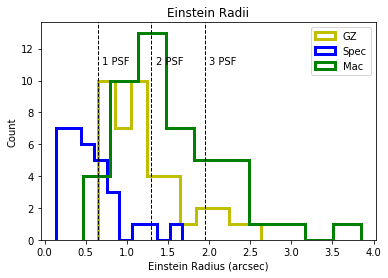

In [10]:
# Histogram of Einstein Radii
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Einstein Radii")
plt.hist(zoo.theta_e,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3)
plt.hist(spec.theta_e2,bins=10,color='b',label='Spec', histtype = 'step', linewidth=3)
plt.hist(mac.theta_e,bins=10,color='g',label='Mac', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
plt.legend(loc='upper right')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 11, '1 PSF')
plt.text(1.35, 11, '2 PSF')
plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/allmethods_theta_e.png')


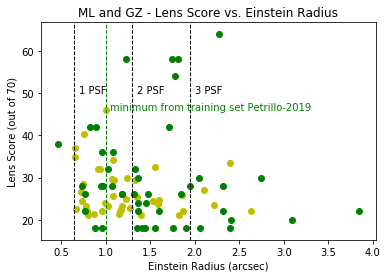

In [11]:
plt.scatter(zoo.theta_e, zoo.LENS_SCORE*70,color='y',label='Zoo')
plt.scatter(mac.theta_e, mac.SCORE,color='g',label='Mac')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 50, '1 PSF')
plt.text(1.35, 50, '2 PSF')
plt.text(2, 50, '3 PSF')
plt.text(1.05, 46, 'minimum from training set Petrillo-2019', color = 'g')
plt.title('ML and GZ - Lens Score vs. Einstein Radius')
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Lens Score (out of 70)")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/mac_zoo_theta_e_score.png')

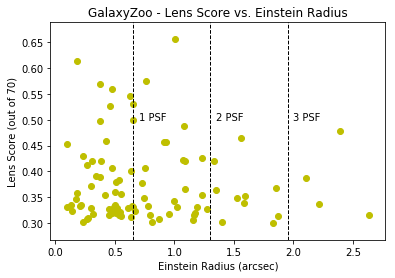

In [21]:
plt.scatter(zoo_30.theta_e, zoo_30.LENS_SCORE,color='Y',label='Zoo')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 0.5, '1 PSF')
plt.text(1.35, 0.5, '2 PSF')
plt.text(2, 0.5, '3 PSF')
#plt.text(1.05, , 'minimum from training set', color = 'g')
plt.title('GalaxyZoo - Lens Score vs. Einstein Radius')
plt.xlabel("Einstein Radius (arcsec)")
plt.ylabel("Lens Score (out of 70)")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/zoo_theta_e_score.png')